In [2]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
tabela = pd.read_csv('/content/Ecommerce_DBS.csv')
print(tabela.head())

Saving Ecommerce_DBS.csv to Ecommerce_DBS.csv
   Customer ID Purchase Date Product Category  Product Price  Quantity  \
0        46251    08/09/2020      Electronics             12         3   
1        46251    05/03/2022             Home            468         4   
2        46251    23/05/2022             Home            288         2   
3        46251    12/11/2020         Clothing            196         1   
4        13593    27/11/2020             Home            449         1   

   Total Purchase Amount  NPS  Customer Age   Gender             Source  \
0                    740    7             20    Male  Instagram Campign   
1                   2739    8             20    Male  Instagram Campign   
2                   3196   10             20    Male                SEM   
3                   3509    3             20    Male  Instagram Campign   
4                   3452    3             20  Female  Instagram Campign   

         Country         State   Latitude  Longituide  
0 

In [3]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

In [4]:
tabela = tabela.dropna()
tabela = tabela.drop_duplicates()
tabela = tabela.drop(columns=['Latitude'])
tabela = tabela.drop(columns=['Longituide'])

Produtos mais vendidos nos últimos 3 anos: (categoria)

In [5]:
from datetime import datetime

anoAtual = datetime.now().year
contAno = anoAtual - 3

contador = {}

for i in range(len(tabela)):
    data = tabela.loc[i, 'Purchase Date']
    try:
        ano = int(data.split('/')[-1])
    except:
        continue

    if ano > contAno:
        produto = tabela.loc[i, 'Product Category']
        quantidade = tabela.loc[i, 'Quantity']

        if produto in contador:
            contador[produto] += quantidade
        else:
            contador[produto] = quantidade

maisVendido = None
qtd_maisVendido = 0

for produto in contador:
    if contador[produto] > qtd_maisVendido:
        maisVendido = produto
        qtd_maisVendido = contador[produto]

print("O produto mais vendido nos últimos 3 anos:", maisVendido)
print("Quantidade vendida:", qtd_maisVendido)



O produto mais vendido nos últimos 3 anos: Books
Quantidade vendida: 43585


Produto mais caro e produto mais barato:

In [6]:
import pandas as pd
tabela = pd.read_csv('/content/Ecommerce_DBS.csv')

maisCaro = None
valorC = 0

maisBarato = None
valorB = None

for i in range(len(tabela)):
    produto = tabela.loc[i, 'Product Category']
    valor = float(tabela.loc[i, 'Product Price'])

    if valor > valorC:
        maisCaro = produto
        valorC = valor

    if valorB == None or valor < valorB:
        maisBarato = produto
        valorB = valor

print(f"O produto mais caro é da categoria: {maisCaro}\nCustando: R${valorC:.2f}")
print(f"O produto mais barato é da categoria: {maisBarato}\nCustando R${valorB:.2f}")

O produto mais caro é da categoria: Electronics
Custando: R$500.00
O produto mais barato é da categoria: Electronics
Custando R$10.00


Qual a categoria de produto mais vendida e menos vendida? E qual a categoria mais e menos cara?

In [7]:
qtd_pCategoria = {}
preco_pCategoria = {}

for i in range(len(tabela)):
    categoria = tabela.loc[i, 'Product Category']
    quantidade = tabela.loc[i, 'Quantity']
    valor = tabela.loc[i, 'Product Price']

    if categoria in qtd_pCategoria:
        qtd_pCategoria[categoria] += quantidade
    else:
        qtd_pCategoria[categoria] = quantidade

    if categoria in preco_pCategoria:
        preco_pCategoria[categoria].append(valor)
    else:
        preco_pCategoria[categoria] = [valor]

print("Categorias:")
for categoria, quantidade in qtd_pCategoria.items():
    print(f"\n{categoria} | Quantidade: {quantidade}")

    maisVendida = max(qtd_pCategoria, key=qtd_pCategoria.get)
    menosVendida = min(preco_pCategoria, key=preco_pCategoria.get)

maisCara = None
precoMaisCaro = 0

maisBarato = None
precoMaisBarato = None

for categoria, valores in preco_pCategoria.items():
    maxPreco = max(valores)
    minPreco = min(valores)

    if maxPreco > precoMaisCaro:
         precoMaisCaro = maxPreco
         maisCara = categoria

    if precoMaisBarato == None or minPreco < precoMaisBarato:
        precoMaisBarato = minPreco
        maisBarato = categoria

print(f"\n- Categoria mais vendida: {maisVendida}\nTendo {qtd_pCategoria[maisVendida]} itens vendidos")
print(f"- Categoria menos vendida: {menosVendida}\nTendo {qtd_pCategoria[menosVendida]} itens vendidos")
print(f"- O produto mais caro faz parte da categoria: {maisCara}\nCom preço de R${precoMaisCaro:.2f}")
print(f"- O produto mais barato faz parte da categoria: {maisBarato}\nCom preço de R${precoMaisBarato}")



Categorias:

Electronics | Quantidade: 150828

Home | Quantidade: 149698

Clothing | Quantidade: 225322

Books | Quantidade: 223876

- Categoria mais vendida: Clothing
Tendo 225322 itens vendidos
- Categoria menos vendida: Electronics
Tendo 150828 itens vendidos
- O produto mais caro faz parte da categoria: Electronics
Com preço de R$500.00
- O produto mais barato faz parte da categoria: Electronics
Com preço de R$10


Qual o produto com o melhor e o pior NPS?

In [8]:
melhorNPS = None
valorMelhorNPS = -1

piorNPS = None
valorPiorNPS = 11

for i in range(len(tabela)):
    produto = tabela.loc[i, 'Product Category']
    nps = tabela.loc[i, 'NPS']

    if nps > valorMelhorNPS:
        valorMelhorNPS = nps
        melhorNPS = produto

    if nps < valorPiorNPS:
        valorPiorNPS = nps
        piorNPS = produto

print(f"Produto com melhor NPS está na categoria: {melhorNPS}\nTendo um NPS de {valorMelhorNPS}")
print(f"Produto com pior NPS está na categoria: {piorNPS}\nTendo um NPS de {valorPiorNPS}")


Produto com melhor NPS está na categoria: Home
Tendo um NPS de 10
Produto com pior NPS está na categoria: Clothing
Tendo um NPS de 0


Analisando a base de dados, qual o tipo de público (considerando gênero e idade) e o canal ideal para vender determinado tipo de produto?

In [9]:
publico = {}
canais_pProduto = {}

def faixa_idade(idade):
    if idade < 18:
        return "menor que 18"
    elif 18 <= idade < 25:
        return "18 a 25"
    elif 25 <= idade < 35:
        return "25 a 35"
    elif 35 <= idade < 45:
        return "35 a 45"
    elif 45 <= idade < 55:
        return "45 a 55"
    else:
        return "55+"

for i in range(len(tabela)):
    genero = tabela.loc[i, 'Gender']
    idade = tabela.loc[i, 'Customer Age ']
    canal = tabela.loc[i, 'Source']
    produto = tabela.loc[i, 'Product Category']

    faixa = faixa_idade(idade)

    tipoPessoa = (genero, faixa)
    if tipoPessoa in publico:
        publico[tipoPessoa] += 1
    else:
        publico[tipoPessoa] = 1

    if produto in canais_pProduto:
        canais_pProduto[produto].append(canal)
    else:
        canais_pProduto[produto] = [canal]

print("Público por gênero e faixa etária:")
for pessoa, qtd in publico.items():
    print(f"{pessoa}: {qtd}")

print("\nMelhor canal para vender cada produto: (com base nos dados)")
for produto, lista_canais in canais_pProduto.items():
    contagem_canais = {}
    for i in lista_canais:
        if i in contagem_canais:
            contagem_canais[i] += 1
        else:
            contagem_canais[i] = 1
    canalMaisUsado = max(contagem_canais, key=contagem_canais.get)
    print(f"{produto}: {canalMaisUsado}")

Público por gênero e faixa etária:
('Male', '18 a 25'): 17500
('Female', '18 a 25'): 17275
('Male', '25 a 35'): 23336
('Female', '25 a 35'): 23982
('Female', '35 a 45'): 23446
('Male', '35 a 45'): 23368
('Male', '45 a 55'): 23177
('Male', '55+'): 37059
('Female', '55+'): 37665
('Female', '45 a 55'): 23192

Melhor canal para vender cada produto: (com base nos dados)
Electronics: Instagram Campign
Home: Instagram Campign
Clothing: Instagram Campign
Books: Instagram Campign


Testes

In [10]:
print(tabela.columns)

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age ', 'Gender',
       'Source', 'Country', 'State', 'Latitude', 'Longituide'],
      dtype='object')


In [11]:
print(tabela.isnull().sum())

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
NPS                      0
Customer Age             0
Gender                   0
Source                   0
Country                  0
State                    0
Latitude                 0
Longituide               0
dtype: int64


In [12]:
print(tabela.duplicated().sum())

0


In [13]:
print(tabela.head())

   Customer ID Purchase Date Product Category  Product Price  Quantity  \
0        46251    08/09/2020      Electronics             12         3   
1        46251    05/03/2022             Home            468         4   
2        46251    23/05/2022             Home            288         2   
3        46251    12/11/2020         Clothing            196         1   
4        13593    27/11/2020             Home            449         1   

   Total Purchase Amount  NPS  Customer Age   Gender             Source  \
0                    740    7             20    Male  Instagram Campign   
1                   2739    8             20    Male  Instagram Campign   
2                   3196   10             20    Male                SEM   
3                   3509    3             20    Male  Instagram Campign   
4                   3452    3             20  Female  Instagram Campign   

         Country         State   Latitude  Longituide  
0         Canada       Alberta  55.000000 -115.0

Gráficos

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv('/content/Ecommerce_DBS.csv')


Produtos mais vendidos nos ultimos 3 anos

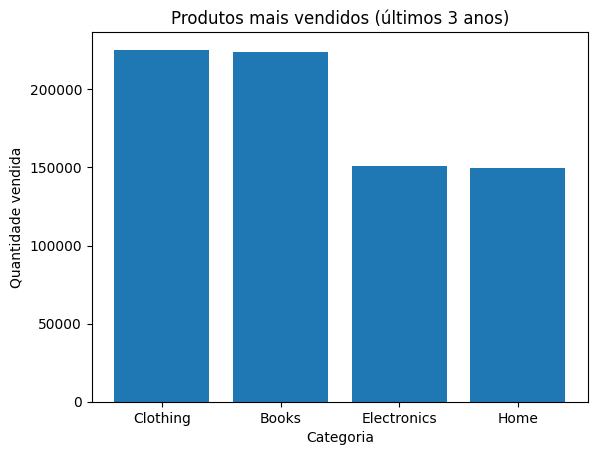

In [15]:
vendas_pCategoria = tabela.groupby('Product Category')['Quantity'].sum()
vendas_pCategoria = vendas_pCategoria.sort_values(ascending=False)

plt.bar(vendas_pCategoria.index, vendas_pCategoria.values)
plt.title("Produtos mais vendidos (últimos 3 anos)")
plt.xlabel("Categoria")
plt.ylabel("Quantidade vendida")
plt.show()

Preço máximo por categoria

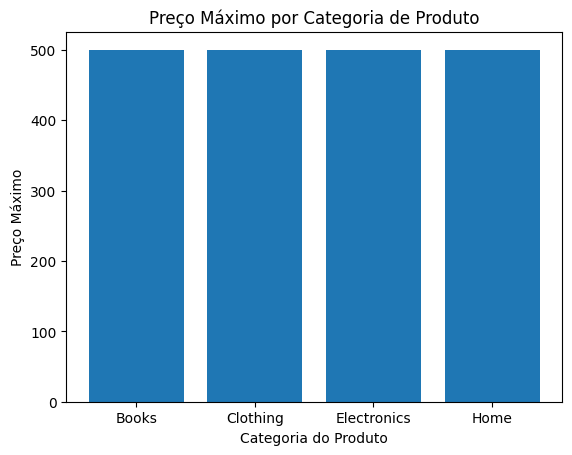

In [16]:
preco_pCategoria = tabela.groupby('Product Category')['Product Price'].max().sort_values(ascending=False)

plt.bar(preco_pCategoria.index, preco_pCategoria.values)
plt.xlabel('Categoria do Produto')
plt.ylabel('Preço Máximo')
plt.title('Preço Máximo por Categoria de Produto')
plt.show()


Categorias mais e menos vendidas.

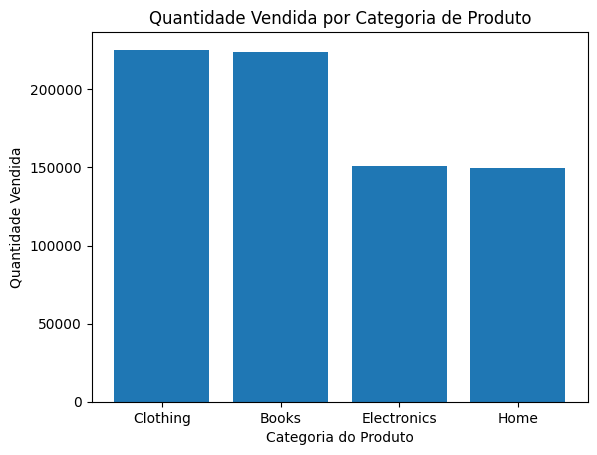

In [18]:
venda_pCategoria = tabela.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

plt.bar(venda_pCategoria.index, venda_pCategoria.values)
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Quantidade Vendida por Categoria de Produto')
plt.show()

NPS por categoria

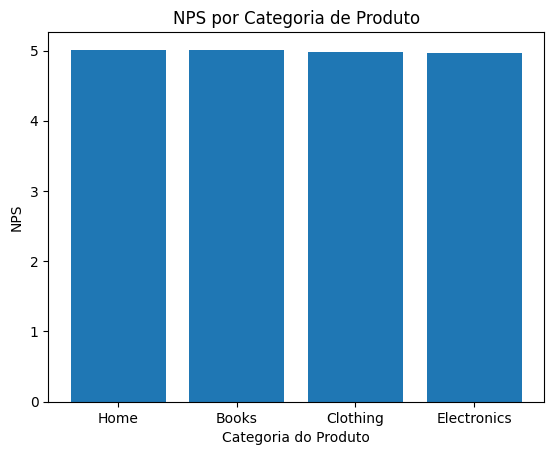

In [19]:
nps_pCategoria = tabela.groupby('Product Category')['NPS'].mean().sort_values(ascending=False)

plt.bar(nps_pCategoria.index, nps_pCategoria.values)
plt.xlabel('Categoria do Produto')
plt.ylabel('NPS')
plt.title('NPS por Categoria de Produto')
plt.show()

Canais de vendas mais usados X Quantidade vendida

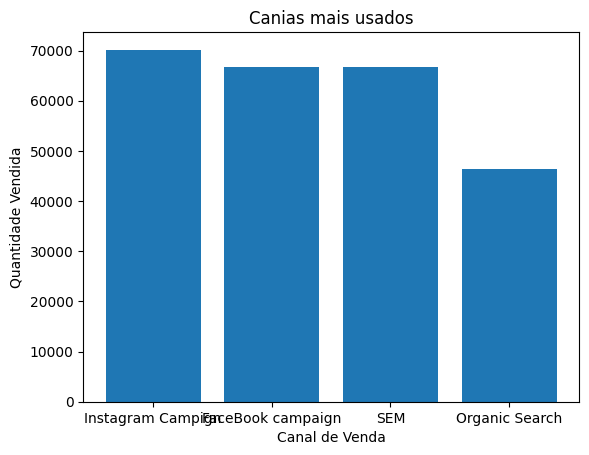

Text(0.5, 1.0, 'Quantidade Vendida por Canal de Venda')

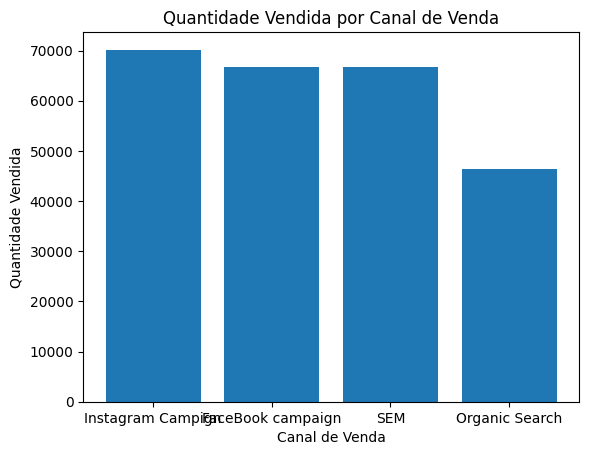

In [26]:
maisUsados = tabela['Source'].value_counts()

plt.bar(maisUsados.index, maisUsados.values)
plt.xlabel('Canal de Venda')
plt.ylabel('Quantidade Vendida')
plt.title('Canias mais usados')
plt.show()

qtd_Vendas = tabela['Source'].value_counts()

plt.bar(qtd_Vendas.index, qtd_Vendas.values)
plt.xlabel('Canal de Venda')
plt.ylabel('Quantidade Vendida')
plt.title('Quantidade Vendida por Canal de Venda')